In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
jul_2020 = pd.read_csv('datasets/202007-divvy-tripdata.csv')
aug_2020 = pd.read_csv('datasets/202008-divvy-tripdata.csv')
sep_2020 = pd.read_csv('datasets/202009-divvy-tripdata.csv')
oct_2020 = pd.read_csv('datasets/202010-divvy-tripdata.csv')
nov_2020 = pd.read_csv('datasets/202011-divvy-tripdata.csv')
dec_2020 = pd.read_csv('datasets/202012-divvy-tripdata.csv')
jan_2021 = pd.read_csv('datasets/202101-divvy-tripdata.csv')
feb_2021 = pd.read_csv('datasets/202102-divvy-tripdata.csv')
mar_2021 = pd.read_csv('datasets/202103-divvy-tripdata.csv')
apr_2021 = pd.read_csv('datasets/202104-divvy-tripdata.csv')
may_2021 = pd.read_csv('datasets/202105-divvy-tripdata.csv')
jun_2021 = pd.read_csv('datasets/202106-divvy-tripdata.csv')

In [3]:
dataframe = [jul_2020, aug_2020, sep_2020, oct_2020, nov_2020, dec_2020, jan_2021, feb_2021, mar_2021, apr_2021, may_2021, jun_2021]
df = pd.concat(dataframe)

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460151 entries, 0 to 729594
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 476.4+ MB


In [6]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [7]:
df['ride_length'] = df['ended_at'] - df['started_at']

In [8]:
df['day_started'] = df['started_at'].dt.dayofweek #Monday = 0, Sunday = 6
df['day_of_week'] = df['started_at'].dt.day_name(locale='English')

In [9]:
df['month_started'] = pd.DatetimeIndex(df['started_at']).month

In [10]:
df['ride_length_min'] = df['ride_length'].astype('timedelta64[m]')

In [11]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    282068
start_station_id      282694
end_station_name      315109
end_station_id        315570
start_lat                  0
start_lng                  0
end_lat                 5286
end_lng                 5286
member_casual              0
ride_length                0
day_started                0
day_of_week                0
month_started              0
ride_length_min            0
dtype: int64

In [12]:
#Remove missing values
df_dropped = df.dropna()

In [13]:
#Remove values with ride_length_min <0 & ride_length_min > 24*60 (1 day)
df_dropped = df_dropped[df_dropped['ride_length_min']>0]  
df_dropped = df_dropped[df_dropped['ride_length_min']< 24*60]

member_casual
casual    1704295
member    2255813
Name: member_casual, dtype: int64

Text(0.5, 1.0, 'Proportion of member type')

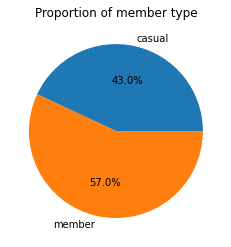

In [14]:
#Proportion of member type
prop = df_dropped.groupby('member_casual')['member_casual'].count()
display(prop)
#Creating chart
fig, ax = plt.subplots()
labels = prop.keys()
ax.pie(x=prop, autopct="%.1f%%",labels=labels)
ax.set_title("Proportion of member type")

In [15]:
#Summary of ride_length_sec by member_casual
summary = df_dropped.groupby('member_casual').agg({'ride_length_min':['min', 'max', 'mean']})
summary

ride_length_min                   
                          min     max       mean
member_casual                                   
casual                    1.0  1439.0  34.030937
member                    1.0  1439.0  14.370181

Text(0.5, 1.0, 'Average length of trip per day per member type')

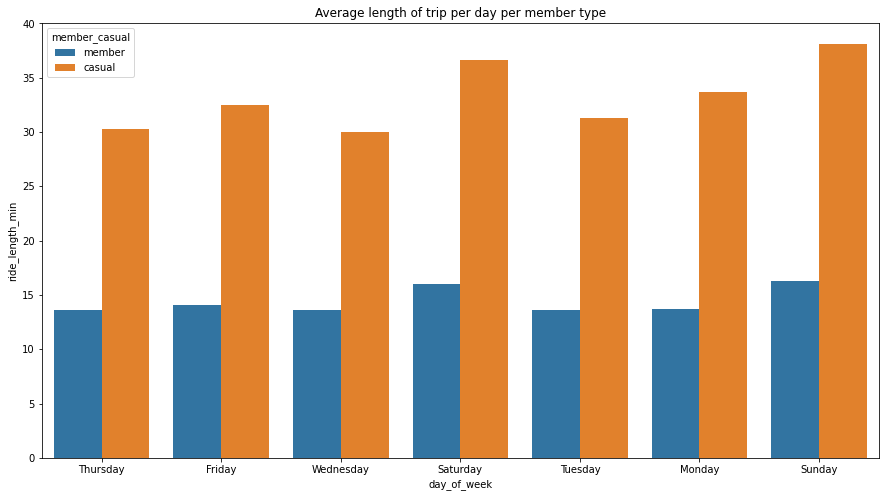

In [16]:
#Display the average ride_length_min for members and casual riders per day
plt.figure(figsize = (15,8))
sns.barplot(data=df_dropped, x='day_of_week',y='ride_length_min',hue='member_casual', ci=None)
plt.title('Average length of trip per day per member type')

Text(0.5, 1.0, 'The number of rides for users per day')

<Figure size 1080x576 with 0 Axes>

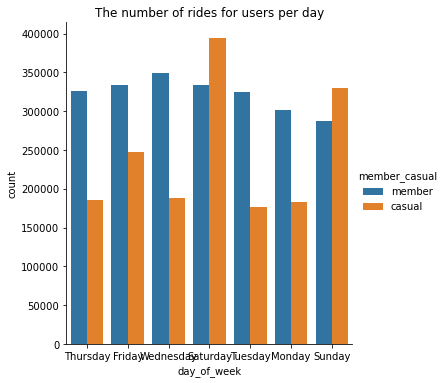

In [17]:
#Display the number of rides for users per day
plt.figure(figsize = (15,8))
sns.catplot(data=df_dropped, x='day_of_week', hue='member_casual', kind='count', ci=None)
plt.title('The number of rides for users per day')


Text(0.5, 1.0, 'Average length of trip per month per member type')

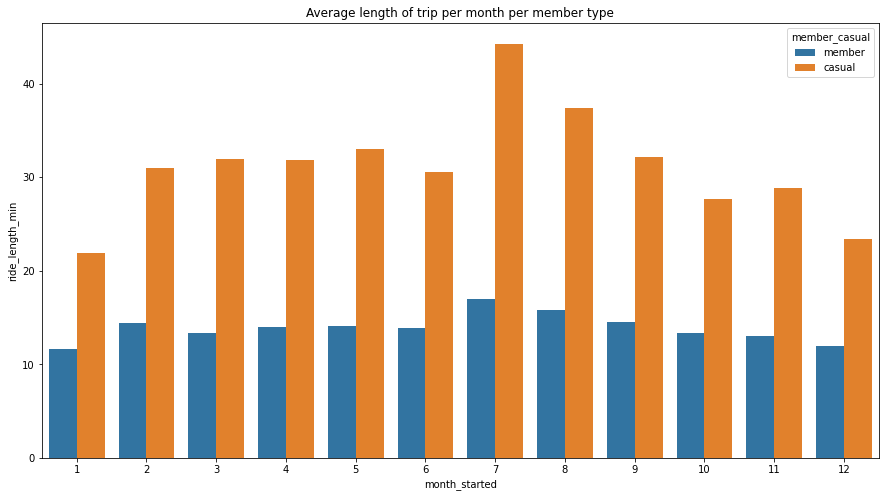

In [18]:
#Display the average ride_length_min for members and casual riders per month
plt.figure(figsize = (15,8))
sns.barplot(data=df_dropped, x='month_started',y='ride_length_min',hue='member_casual', ci=None)
plt.title('Average length of trip per month per member type')

Text(0.5, 1.0, 'The Average Number of Riders by Month')

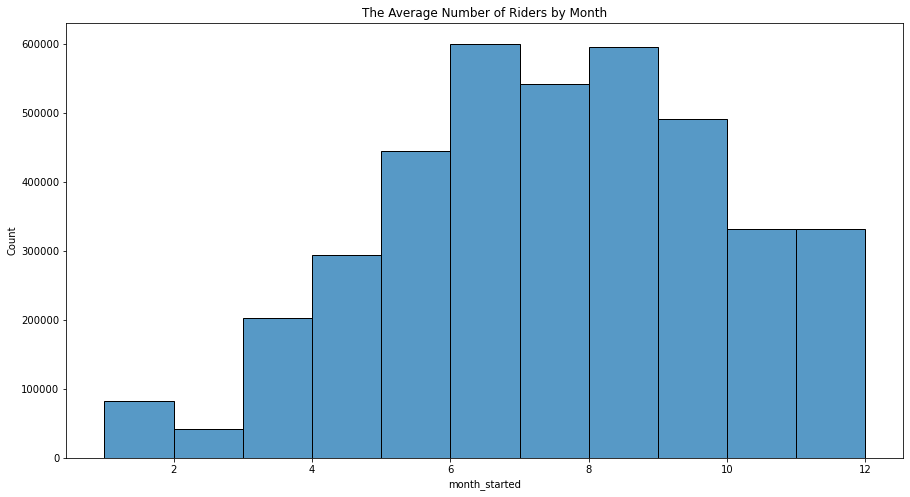

In [19]:
#Display The Average Number of Riders by Month
plt.figure(figsize = (15,8))
sns.histplot(df_dropped, x='month_started', binwidth=1)
plt.title('The Average Number of Riders by Month')

<Figure size 936x576 with 0 Axes>

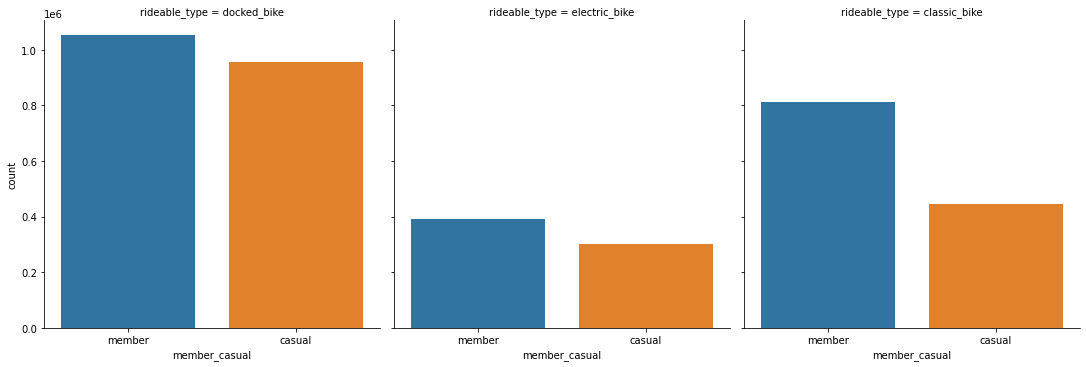

In [20]:
#Display the usage of bikes by members and casual riders
plt.figure(figsize = (13,8))
sns.catplot(data=df_dropped, x='member_casual',kind='count',col='rideable_type', ci=None)